In [ ]:
# Steepest descent and Newton line-search methods applied to LJ7 cluster in 3D 
import numpy as np
import matplotlib.pyplot as plt
from LJhelpers import *

In [ ]:
# Set up the initial configuration

# Four lical minima of LJ7:
# f1 = -16.50538417 Pentagonal bipyramid 
# f2 = -15.93504306 Capped octahedron 
# f3 = -15.59321094 Tricapped tetrahedron 
# f4 = -15.53306005 Bicapped trigonal bipyramid

# Options: model = 0,1,2,3, or 4.
# Model 0 corresponds to a random initialization.
# Models 1--4 set the system up close to the corresponding local minima
# listed above.


In [ ]:
Na = 7 #the number of atoms
rstar = 2**(1/6) # argument of the minimum of the Lennard-Jones pair potential V(r) = r^(-12) - r^(-6)
tol = 1e-9 # stop iterations when ||grad f|| < tol
iter_max = 1000 # the maximal number of iterations
draw_flag = 1 # if draw_flag = 1, draw configuration at every iteration
# parameters for backtracking line search
c = 0.1;
rho = 0.9;

initial_near=[-16.50,-15.93,-15.59,-15.53]
initial_random=-20

In [80]:
def descend(model,direction=2):
    #model = 0
    
    if( model > 0):
        Na = 7
    else:
        Na = 7
    xyz = initial_configuration(model,Na,rstar)
    # drawconf(xyz,0.5*rstar);
    
    x = remove_rotations_translations(xyz)
    # drawconf(LJvector2array(x),0.5*rstar)
    print("LJpot = ",LJpot(x))
    # print(LJhess(x))
    # start minimization
    # choose algorithm
    # direction = 0: steepest descent
    # direction = 1: Newton
    
    f = LJpot(x)
    g = LJgrad(x)
    x_old=np.zeros(len(x))
    g_old=np.zeros(len(g))
    B=np.eye(len(x))
    H = LJhess(x)
    
    norm_g = np.linalg.norm(g)
    print("Initially, f = ",f,", ||grad f|| = ",norm_g)
    
    fvals = np.zeros(iter_max)
    fvals[0] = f
    ngvals = np.zeros(iter_max)
    ngvals[0] = norm_g
    
    itr = 1
    
    while (norm_g > tol and itr < iter_max): 
        #choose search direction
        if( direction == 0): # steepest descent
            p = -g
            dir = "SD"
        elif( direction == 1): # Newton
            H = LJhess(x)
            p = np.linalg.solve(H,-g) 
            # if( np.dot(g,p) < 0 ): # descent direction
                # dir = "Newton"            
    #         print(np.linalg.eigvals(H))
            spd = np.all(np.linalg.eigvals(H) > 0)
            if( spd ): # H is SPD, use Newton's direction
                p = np.linalg.solve(H,-g) 
                dir = "Newton"
            else: # use the steepest descent direction
                p = -g
                dir = "SD";
        elif( direction == 2): # BFGS
            s=x-x_old
            y=g-g_old
            # if itr%20 == 0:
            #     print('itr = ',itr)
            #     B=np.eye(len(x))
            B=B-(np.outer(B.dot(s),B.dot(s)))/(s.dot(B).dot(s) + 1e-12)+(np.outer(y,y))/(y.dot(s) +1e-12)
            
            spd = np.all(np.linalg.eigvals(B) > 0)
            if( spd ): # H is SPD, use BFGS direction
                p = np.linalg.solve(B,-g) 
                # print('B-H_norm', np.linalg.norm(B-H))
                dir = "BFGS"
            else: # use the steepest descent direction
                p = -g
                dir = "SD";
            
        else:
            print("direction is out of range")
            break
        # normalize the search direction if its length greater than 1
        norm_p = np.linalg.norm(p)
        if( norm_p > 1):
            p = p/norm_p
        # do backtracking line search along the direction p
        a = 1 # initial step length
        f_temp = LJpot(x + a*p)
        cpg = c*np.dot(p,g)
    #     print("cpg = ",cpg,"f = ",f,"f_temp = ",f_temp)
        while( f_temp > f + a*cpg ): # check Wolfe's condition 1
            a = a*rho
            if( a < 1e-14 ):
                print("line search failed\n");
                itr = iter_max - 1
                break
            f_temp = LJpot(x + a*p)        
    #         print("f_temp = ",f_temp)
        x_old=x
        g_old=g
        x = x + a*p
        f = LJpot(x)
        g = LJgrad(x)
        norm_g = np.linalg.norm(g)
    #     print("itr ",itr,": dir = ",dir,", f = ",f,", ||grad f|| = ",norm_g,", step length = ",a)
    #     if dir == "BFGS":
    #     print(f"itr {itr}: dir = {dir}, f = {f:.6f}, ||grad f|| = {norm_g:.6e}, step length = {a:.3e}")
        if( itr%100 == 0):
            # restore all coordinates
            xyz = LJvector2array(x)
            # print('xyz = ',xyz)
            # drawconf(xyz,0.5*rstar)
        fvals[itr] = f
        ngvals[itr] = norm_g
        itr = itr + 1
    print(f"Result: f = {f:.10f}, ||grad f|| = {norm_g:.6e}")
    print('itr = ', itr)
    return (fvals, ngvals, itr)
        

LJpot =  -11.517662869490488
Initially, f =  -11.517662869490488 , ||grad f|| =  16.468632904952266
Result: f = -16.5053841680, ||grad f|| = 2.573508e-07
itr =  1000
LJpot =  -11.517662869490488
Initially, f =  -11.517662869490488 , ||grad f|| =  16.468632904952266
Result: f = -16.5053841680, ||grad f|| = 2.242025e-13
itr =  13
LJpot =  -11.517662869490488
Initially, f =  -11.517662869490488 , ||grad f|| =  16.468632904952266
Result: f = -16.5053841680, ||grad f|| = 6.090833e-10
itr =  44


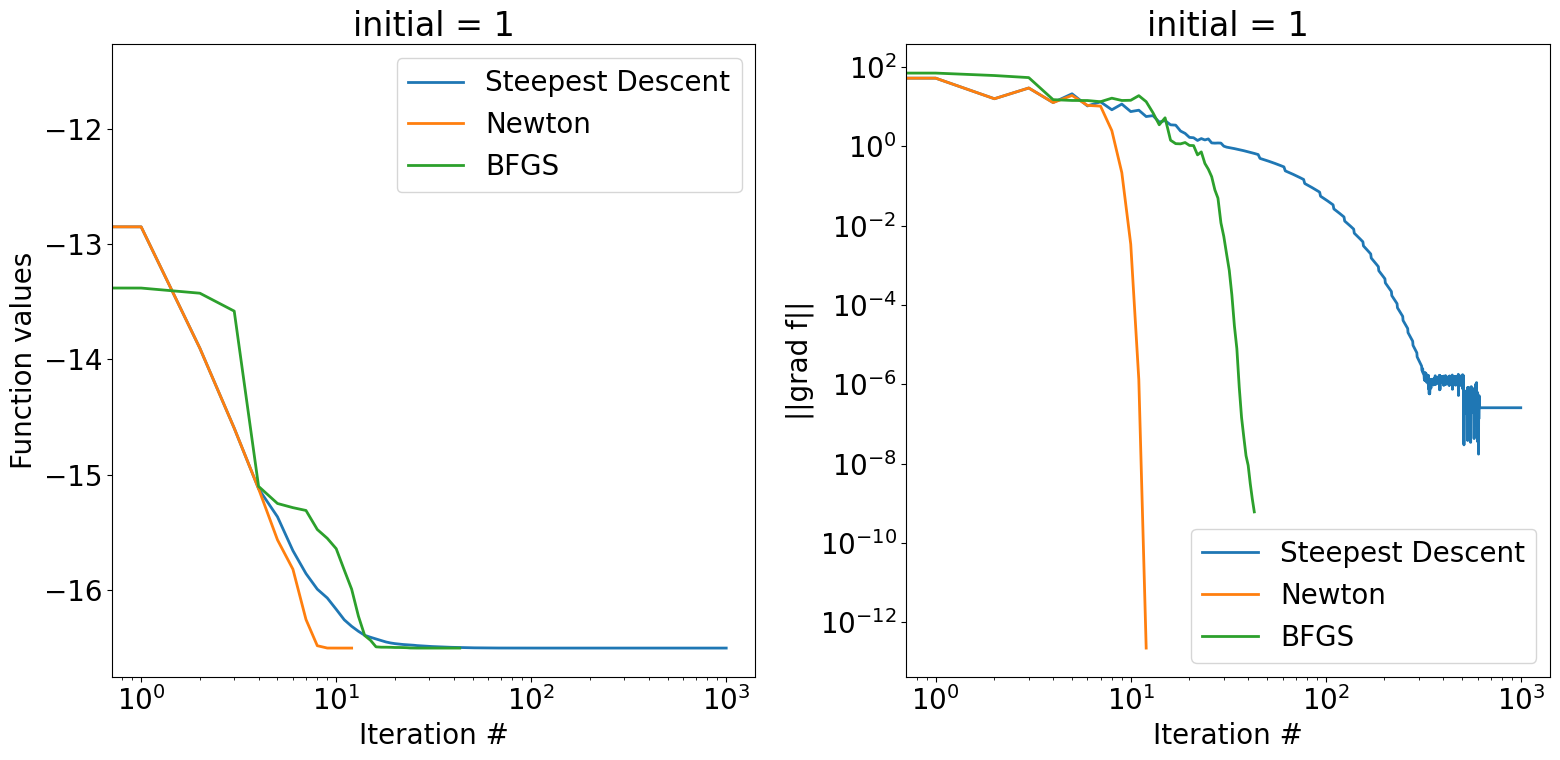

LJpot =  -15.921231995884773
Initially, f =  -15.921231995884773 , ||grad f|| =  2.119680077530262
Result: f = -15.9350430605, ||grad f|| = 8.061829e-07
itr =  1000
LJpot =  -15.921231995884773
Initially, f =  -15.921231995884773 , ||grad f|| =  2.119680077530262
Result: f = -15.9350430605, ||grad f|| = 2.519526e-14
itr =  5
LJpot =  -15.921231995884773
Initially, f =  -15.921231995884773 , ||grad f|| =  2.119680077530262
Result: f = -15.9350430605, ||grad f|| = 8.393116e-11
itr =  27


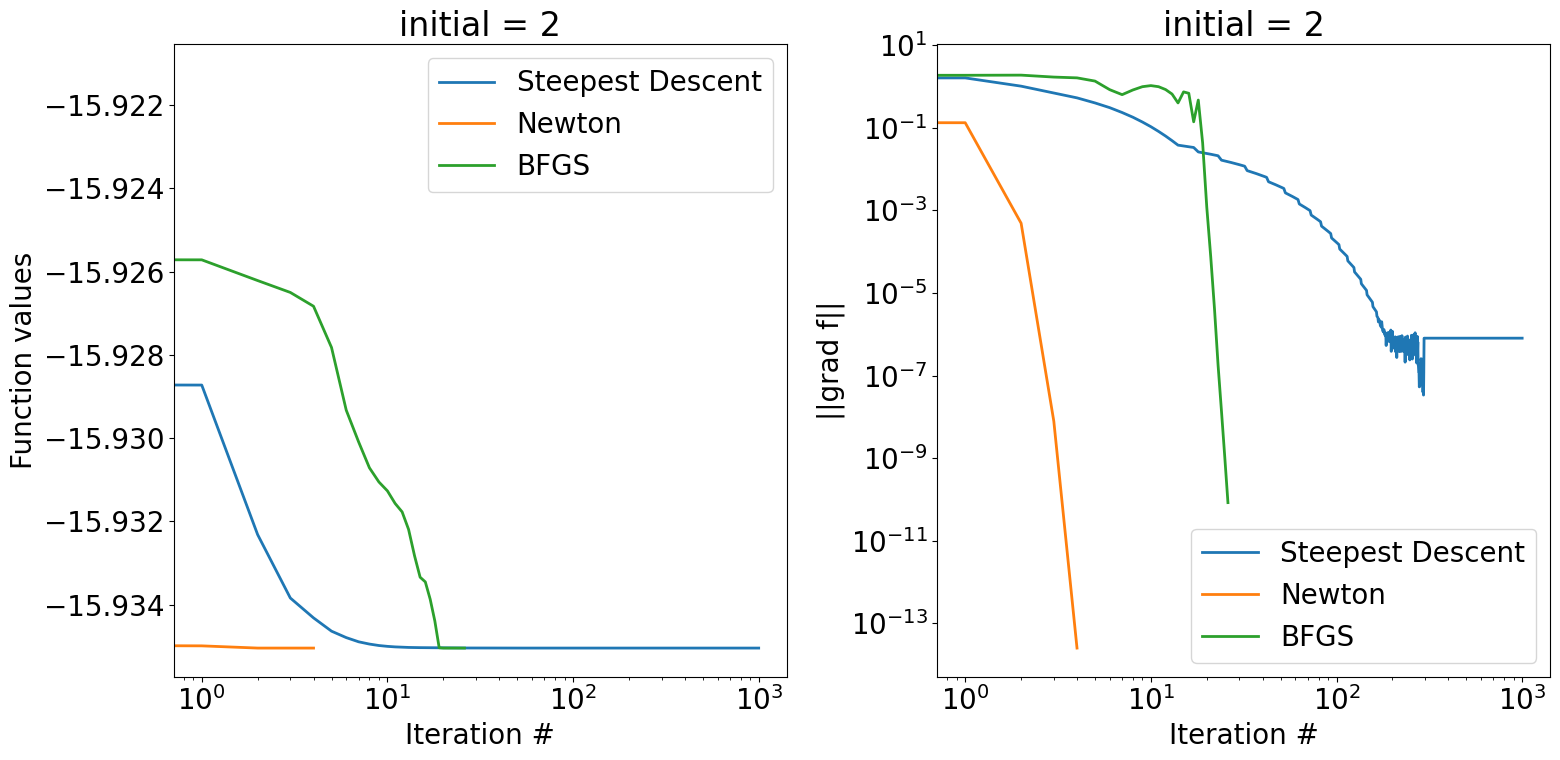

LJpot =  -15.581469160072078
Initially, f =  -15.581469160072078 , ||grad f|| =  1.46083663929382
Result: f = -15.5932109382, ||grad f|| = 1.114211e-07
itr =  1000
LJpot =  -15.581469160072078
Initially, f =  -15.581469160072078 , ||grad f|| =  1.46083663929382
Result: f = -15.5932109382, ||grad f|| = 4.150219e-14
itr =  5
LJpot =  -15.581469160072078
Initially, f =  -15.581469160072078 , ||grad f|| =  1.46083663929382
Result: f = -15.5932109382, ||grad f|| = 6.661426e-10
itr =  28


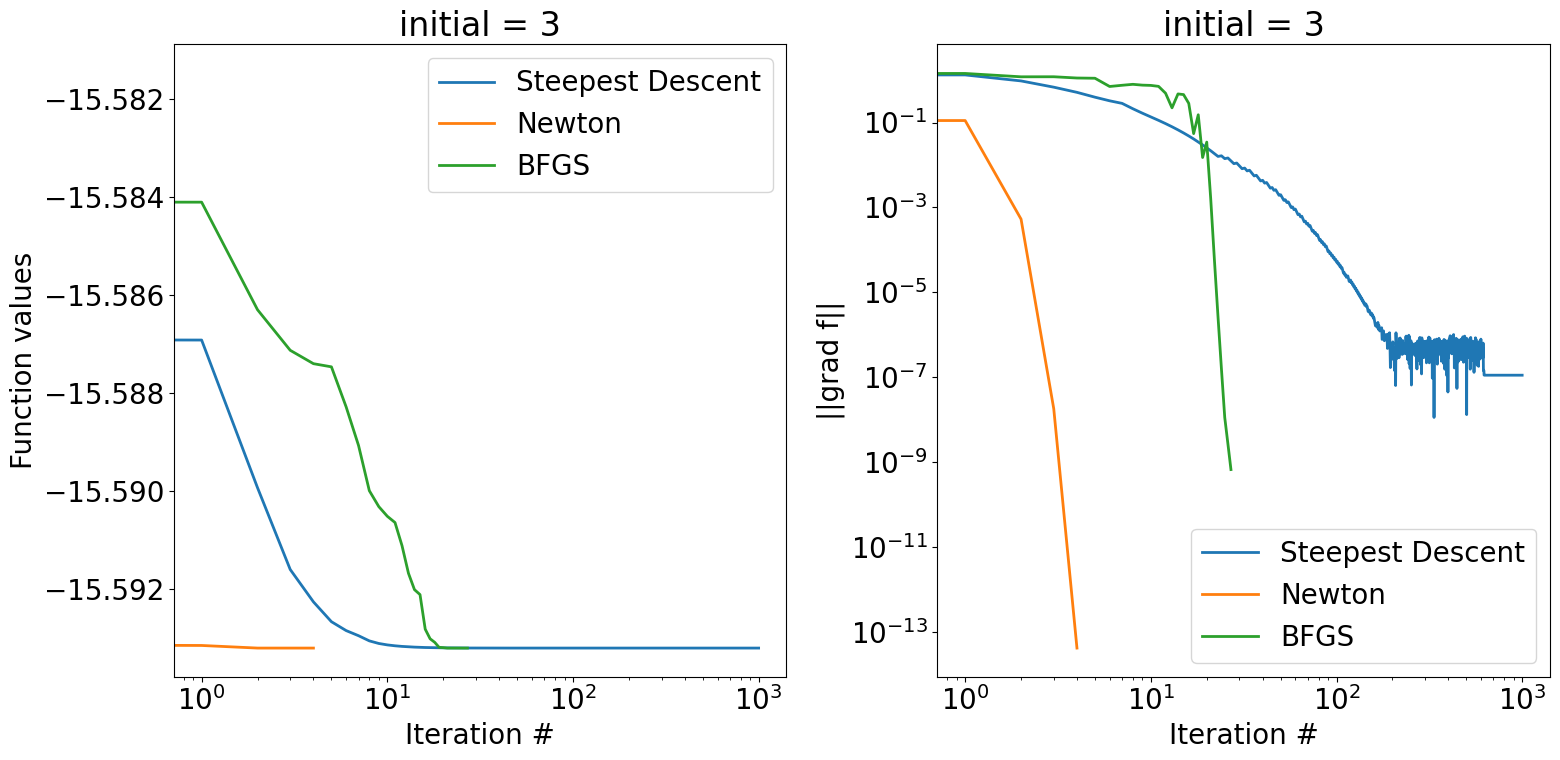

LJpot =  -15.522210169999571
Initially, f =  -15.522210169999571 , ||grad f|| =  1.2854375635525659
Result: f = -15.5330600546, ||grad f|| = 1.104317e-07
itr =  1000
LJpot =  -15.522210169999571
Initially, f =  -15.522210169999571 , ||grad f|| =  1.2854375635525659
Result: f = -15.5330600546, ||grad f|| = 2.221320e-14
itr =  5
LJpot =  -15.522210169999571
Initially, f =  -15.522210169999571 , ||grad f|| =  1.2854375635525659
Result: f = -15.5330600546, ||grad f|| = 6.444631e-11
itr =  29


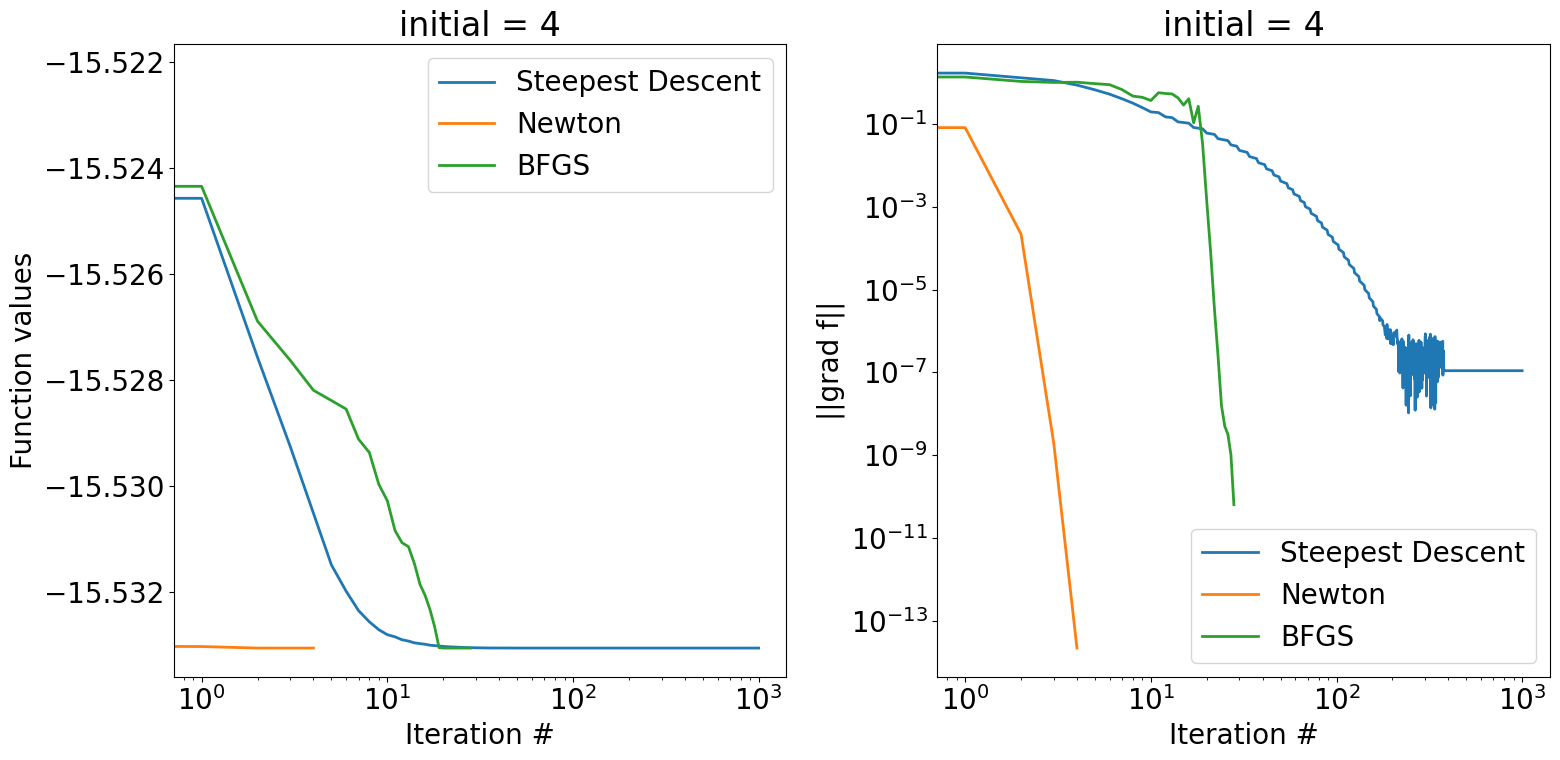

In [81]:
#4 initials near the 4 minimums 
for initial in range(1,5):
    plt.rcParams.update({'font.size': 20})
    plt.figure(figsize=(16,8))
    direction_dict = {0:"Steepest Descent",1:"Newton",2:"BFGS"} #
    for direction in direction_dict:
        fvals, ngvals , itr=descend(initial,direction)
        plt.subplot(1, 2, 1)
        plt.plot(np.arange(itr),fvals[0:itr],linewidth = 2, label=direction_dict[direction]) #todo less than itermax
        plt.title("initial = "+str(initial))
        plt.xlabel("Iteration #")
        plt.xscale("log")
        plt.ylabel("Function values")
        # plt.yscale("log")
        plt.legend()
        #second plot of gradients
        plt.subplot(1, 2, 2)
        plt.plot(np.arange(itr),ngvals[0:itr],linewidth = 2, label=direction_dict[direction])
        plt.title("initial = "+str(initial))
        plt.xlabel("Iteration #")
        plt.xscale("log")
        plt.ylabel("||grad f||")
        plt.yscale("log")
        plt.legend()
    plt.tight_layout()    
    plt.show()



LJpot =  81099.56613849927
Initially, f =  81099.56613849927 , ||grad f|| =  2437628.6308677145
Result: f = -15.5330600546, ||grad f|| = 1.345291e-07
itr =  1000
LJpot =  -8.324427369222384
Initially, f =  -8.324427369222384 , ||grad f|| =  35.61925493537098
Result: f = -15.5330600546, ||grad f|| = 7.240418e-13
itr =  306
LJpot =  -6.179172009568728
Initially, f =  -6.179172009568728 , ||grad f|| =  14.318655057734757
Result: f = -15.5330600546, ||grad f|| = 5.036797e-10
itr =  89


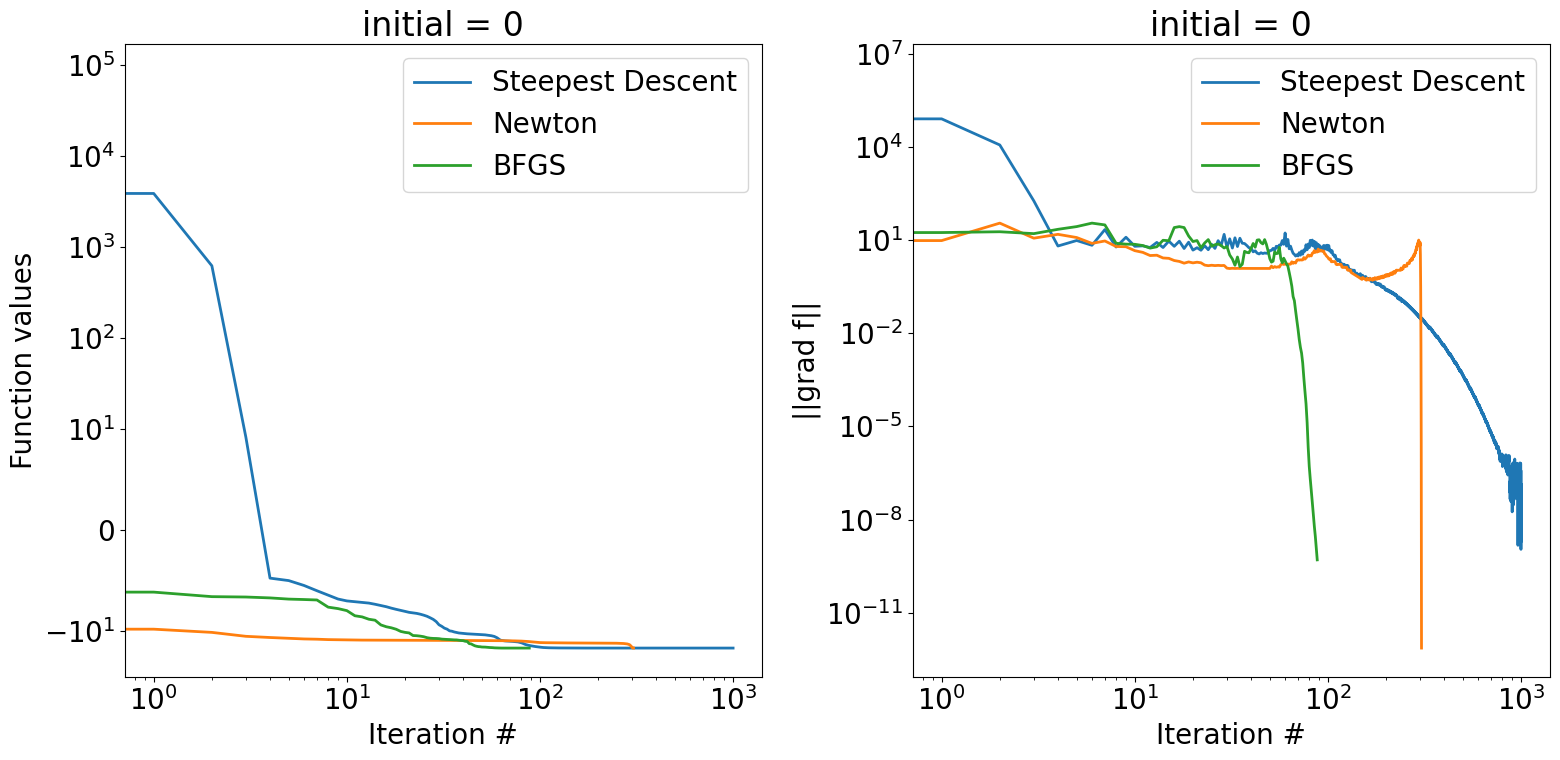

LJpot =  -5.852297594756618
Initially, f =  -5.852297594756618 , ||grad f|| =  7.627784475209434
Result: f = -15.5330600546, ||grad f|| = 2.148618e-06
itr =  1000
LJpot =  251287.09003445925
Initially, f =  251287.09003445925 , ||grad f|| =  3990352.168456213
Result: f = -14.5782401400, ||grad f|| = 1.992480e-01
itr =  1000
LJpot =  -2.569195372231752
Initially, f =  -2.569195372231752 , ||grad f|| =  106.015902913965
Result: f = -15.5330600546, ||grad f|| = 7.418359e-10
itr =  84


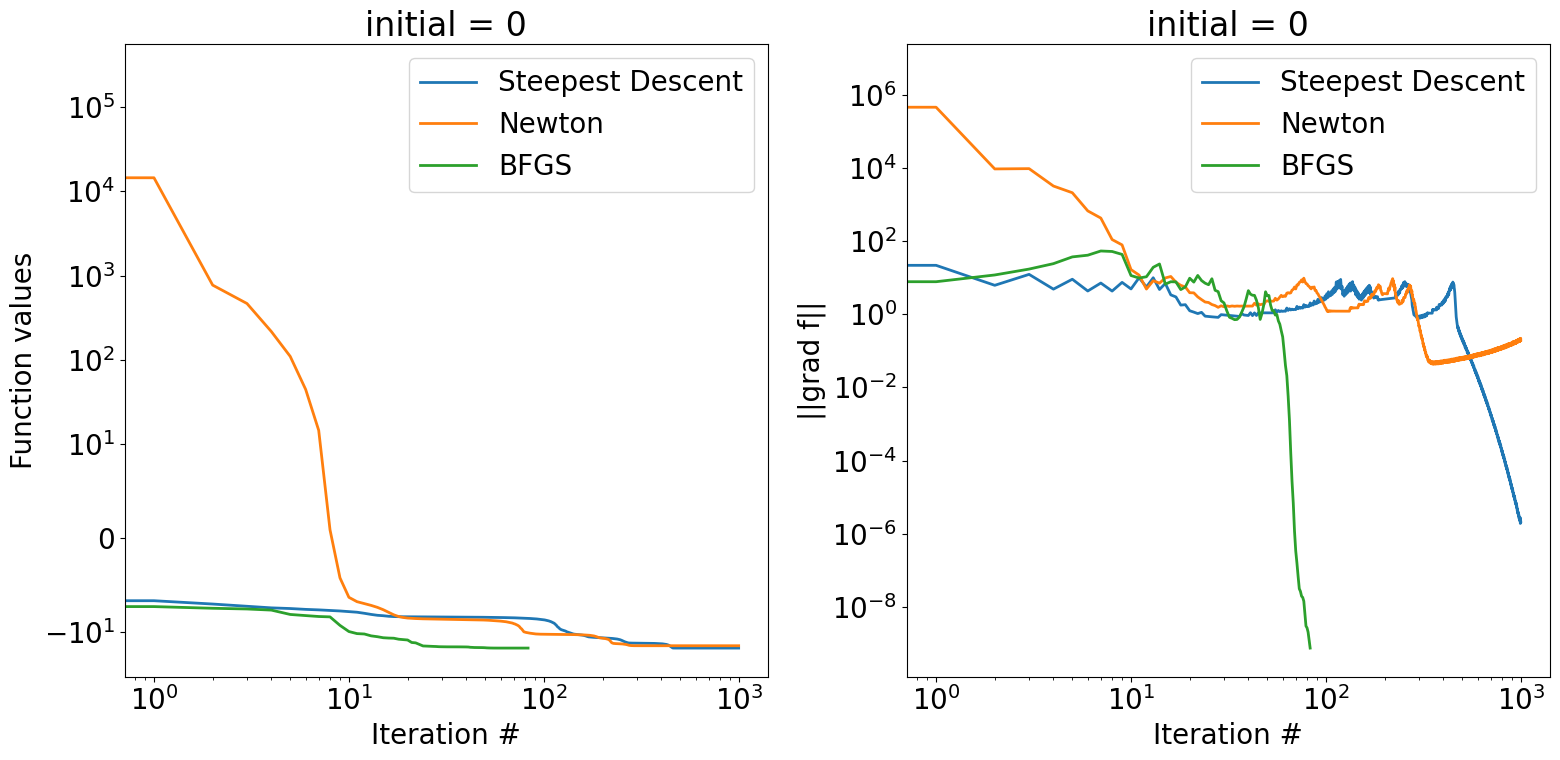

LJpot =  220502.8697346938
Initially, f =  220502.8697346938 , ||grad f|| =  4970079.587846652
Result: f = -16.5053841680, ||grad f|| = 7.769708e-10
itr =  433
LJpot =  -6.555442861328135
Initially, f =  -6.555442861328135 , ||grad f|| =  8.425494186453438
Result: f = -16.5053841680, ||grad f|| = 5.067137e-14
itr =  541
LJpot =  26.48217410584884
Initially, f =  26.48217410584884 , ||grad f|| =  549.8241139706628
Result: f = -15.5932109382, ||grad f|| = 8.743288e-10
itr =  78


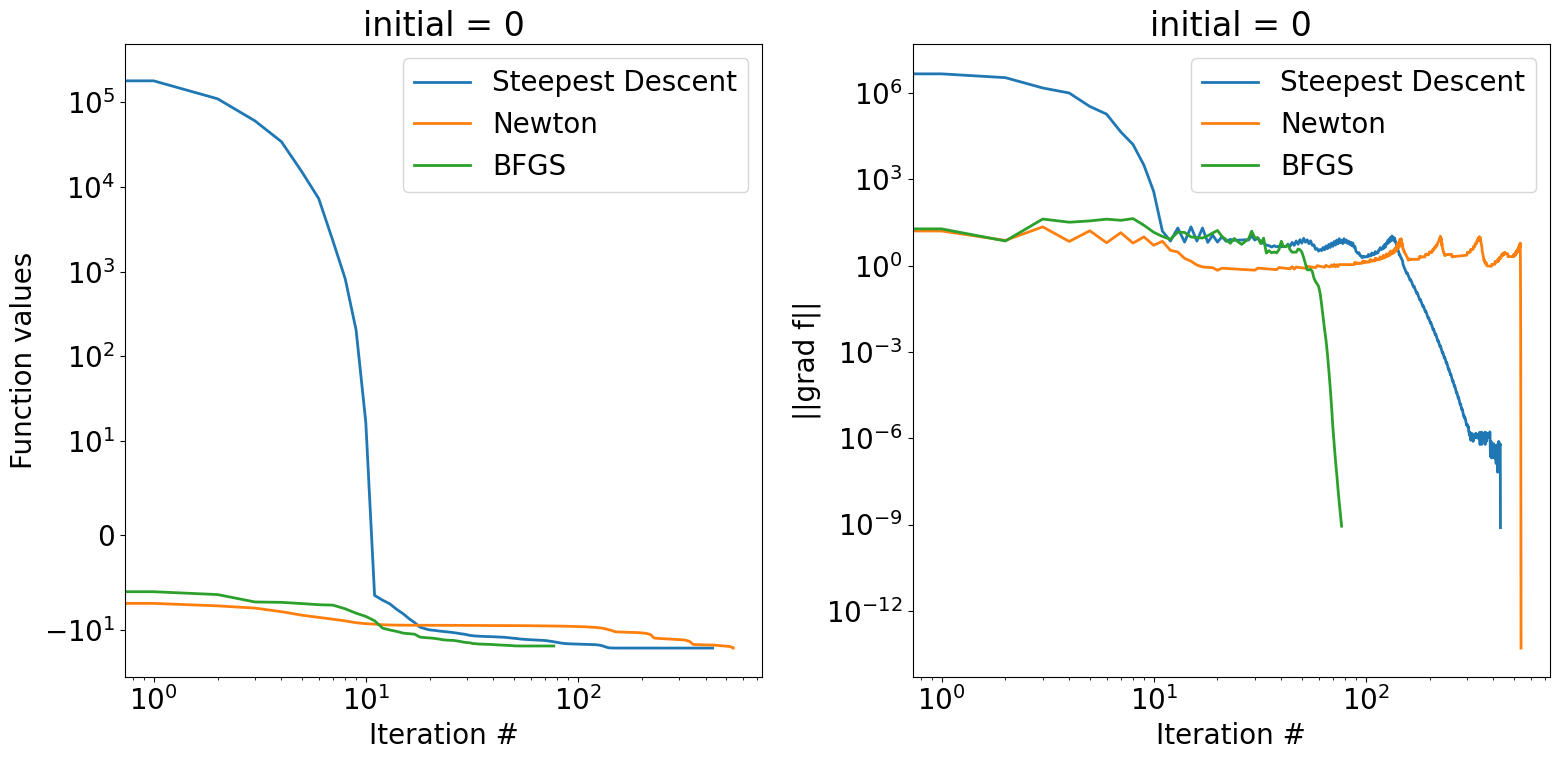

LJpot =  2418.8822508964095
Initially, f =  2418.8822508964095 , ||grad f|| =  26261.367496313258
Result: f = -15.5330600546, ||grad f|| = 1.997971e-07
itr =  1000
LJpot =  -7.672337321666063
Initially, f =  -7.672337321666063 , ||grad f|| =  11.04339475336392
Result: f = -15.5330600546, ||grad f|| = 1.095432e-13
itr =  419
LJpot =  34461798260.000916
Initially, f =  34461798260.000916 , ||grad f|| =  2782663783435.383
Result: f = -15.5330600546, ||grad f|| = 9.850989e-10
itr =  112


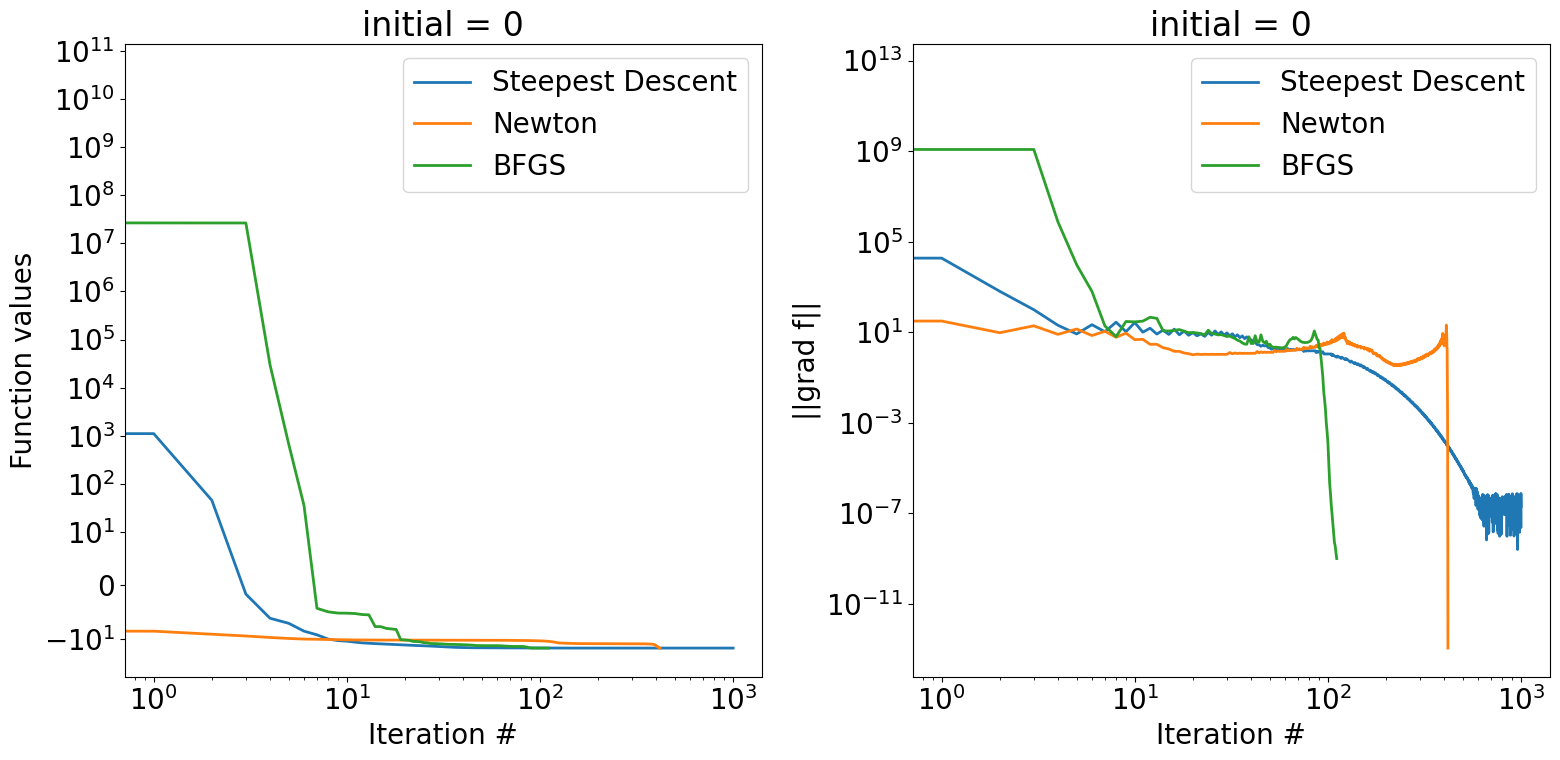

LJpot =  8179.473989184904
Initially, f =  8179.473989184904 , ||grad f|| =  166930.64872217554
Result: f = -15.5330600546, ||grad f|| = 3.202350e-07
itr =  1000
LJpot =  -5.503211749628885
Initially, f =  -5.503211749628885 , ||grad f|| =  37.25239520023511
Result: f = -15.5932109382, ||grad f|| = 1.989440e-14
itr =  269
LJpot =  433480198.0711347
Initially, f =  433480198.0711347 , ||grad f|| =  24307818192.203094
Result: f = -15.5330600546, ||grad f|| = 6.862915e-10
itr =  126


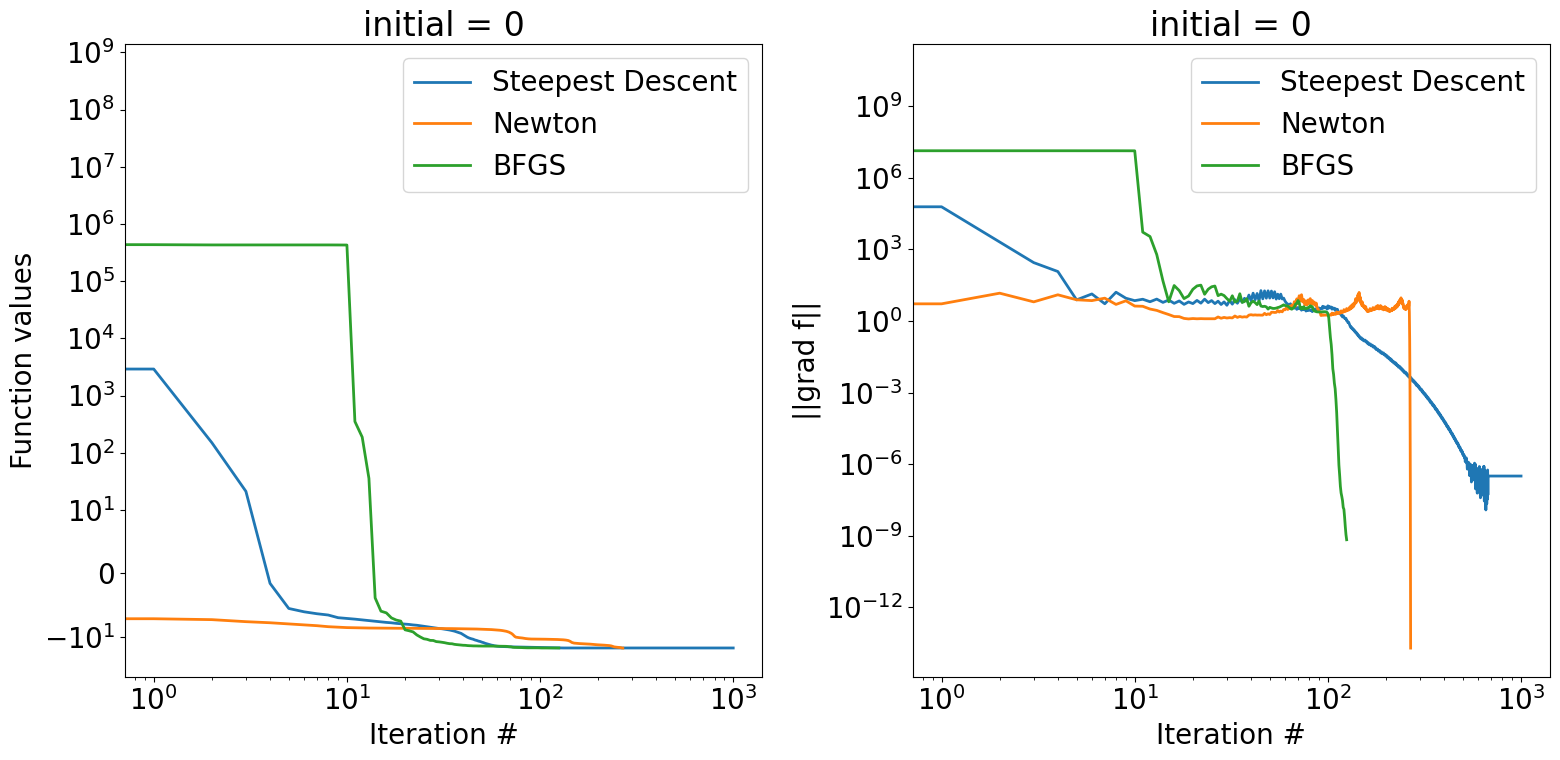

LJpot =  -6.639055466182066
Initially, f =  -6.639055466182066 , ||grad f|| =  7.867944255569423
Result: f = -15.5330600546, ||grad f|| = 3.559334e-07
itr =  1000
LJpot =  4.580573987891144
Initially, f =  4.580573987891144 , ||grad f|| =  243.38043054493895
Result: f = -16.5053841680, ||grad f|| = 2.698696e-14
itr =  180
LJpot =  47.75289944912448
Initially, f =  47.75289944912448 , ||grad f|| =  909.8822837904087
Result: f = -15.5330600546, ||grad f|| = 5.058034e-10
itr =  74


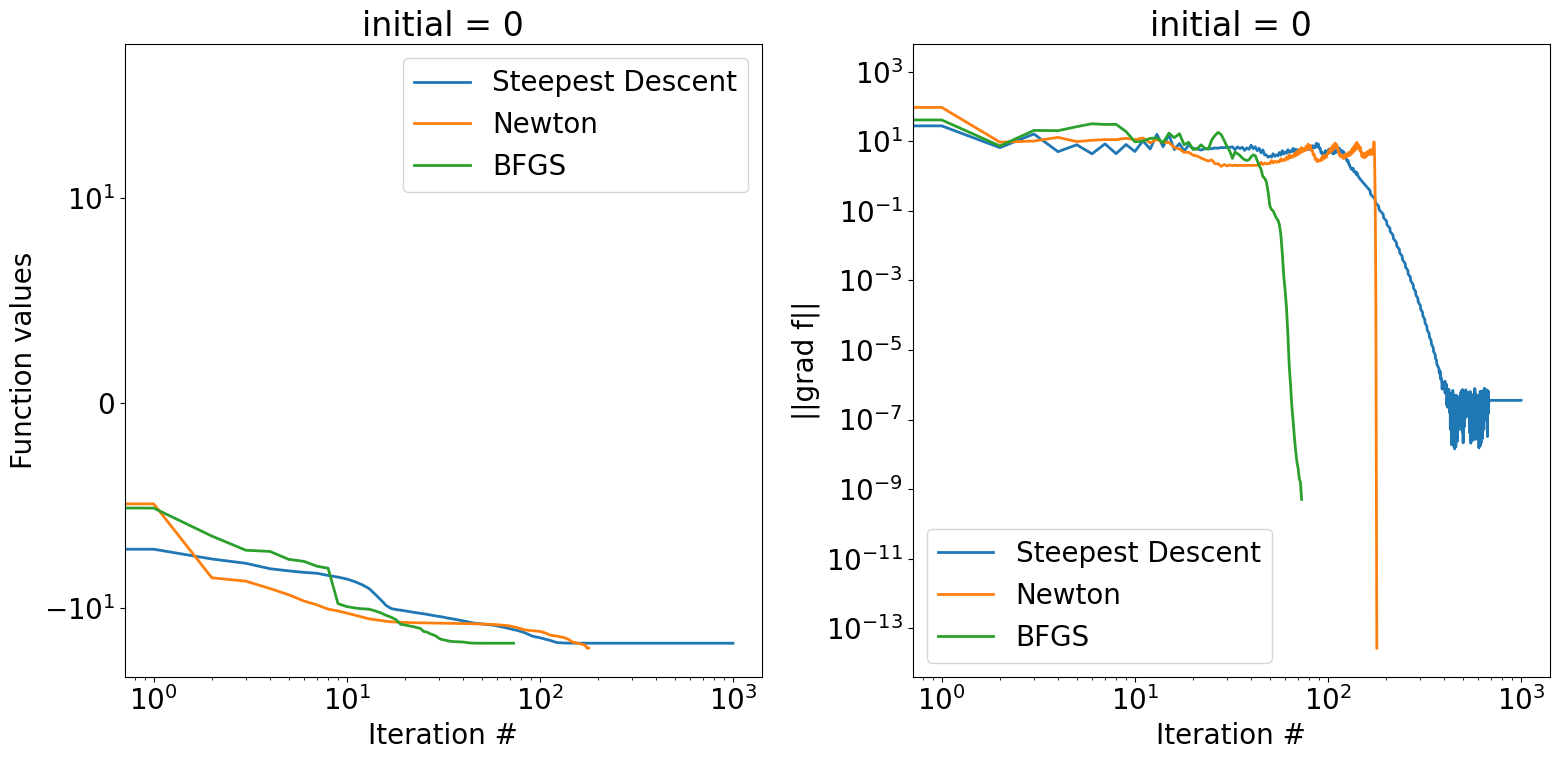

LJpot =  2509.8695753579796
Initially, f =  2509.8695753579796 , ||grad f|| =  42283.978445252855
Result: f = -15.5330600546, ||grad f|| = 3.408495e-07
itr =  1000
LJpot =  992.4965180765764
Initially, f =  992.4965180765764 , ||grad f|| =  11631.067265963706
Result: f = -16.5053841680, ||grad f|| = 8.568712e-11
itr =  158
LJpot =  -5.484488087345078
Initially, f =  -5.484488087345078 , ||grad f|| =  6.668403006851568
Result: f = -15.5330600546, ||grad f|| = 4.924666e-10
itr =  69


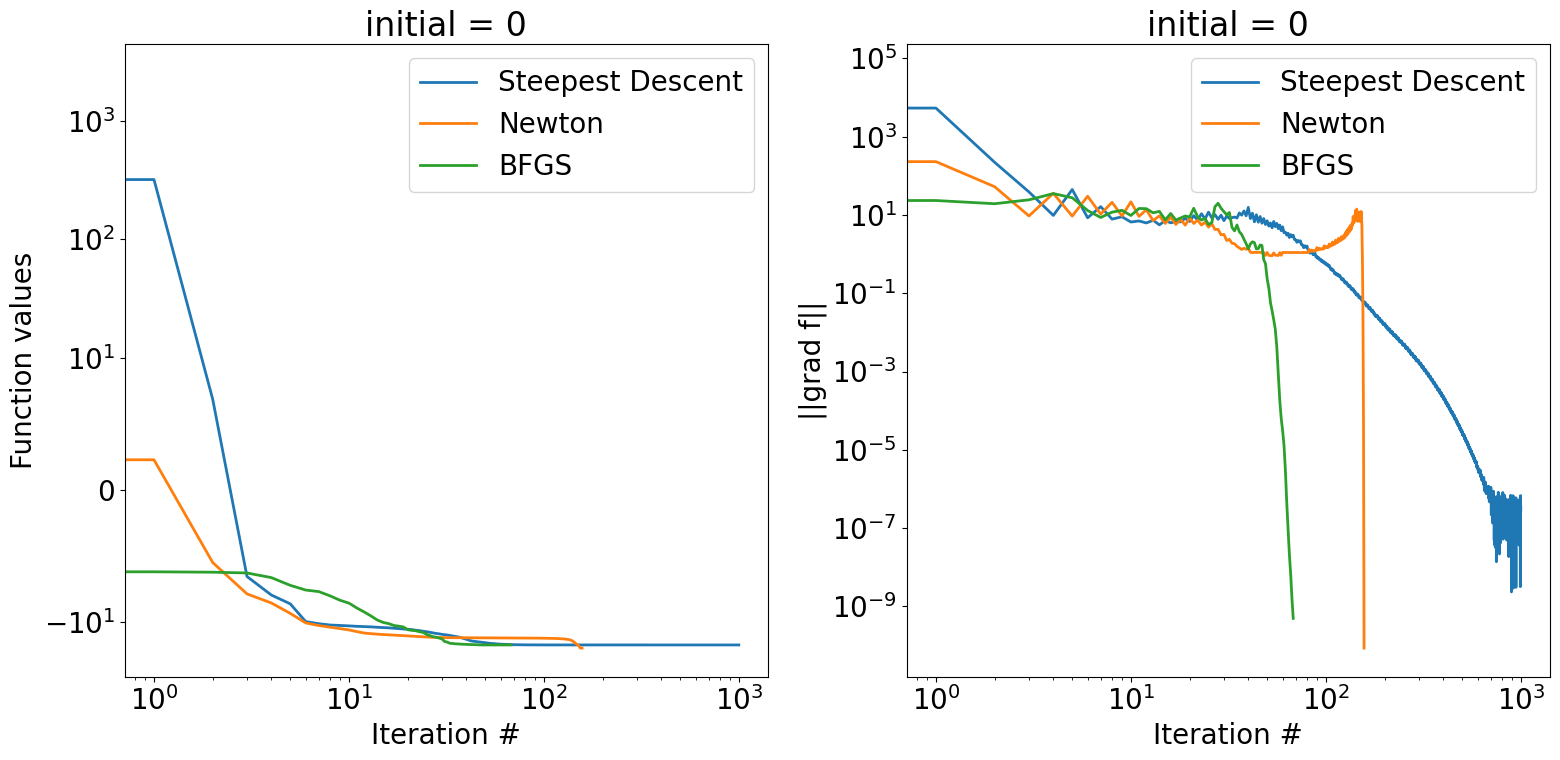

LJpot =  -6.406160908212164
Initially, f =  -6.406160908212164 , ||grad f|| =  7.689418499248008
Result: f = -15.5330600546, ||grad f|| = 9.279425e-08
itr =  1000
LJpot =  15332.946769748862
Initially, f =  15332.946769748862 , ||grad f|| =  355421.9861811916
Result: f = -15.5330600546, ||grad f|| = 2.573197e-11
itr =  143
LJpot =  75779.43056306874
Initially, f =  75779.43056306874 , ||grad f|| =  2063442.6173976897
Result: f = -4.0093284699, ||grad f|| = 4.096747e-02
itr =  1000


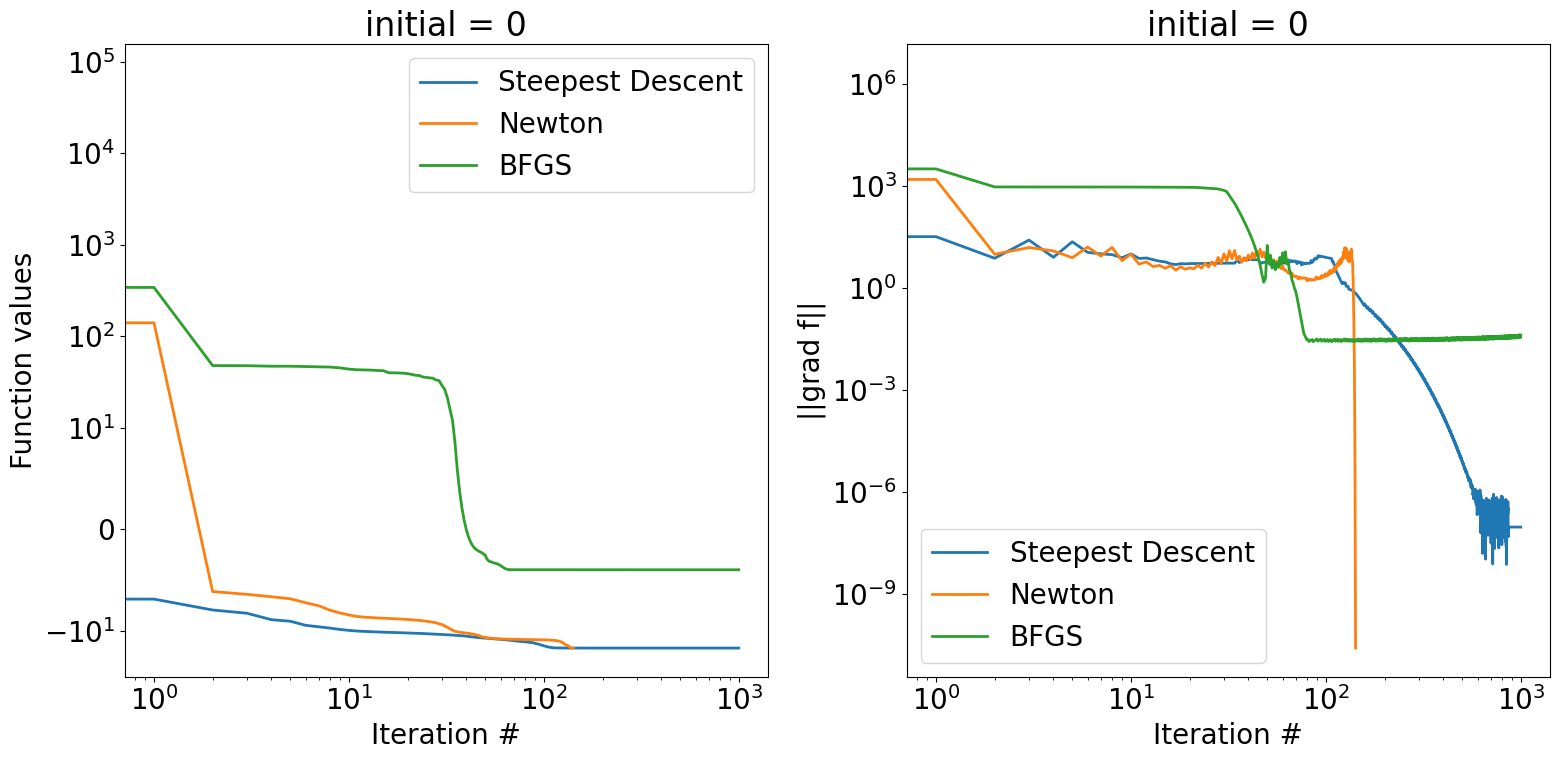

LJpot =  217951.35347401793
Initially, f =  217951.35347401793 , ||grad f|| =  4349105.360469887
Result: f = -16.5053841680, ||grad f|| = 4.922517e-07
itr =  1000
LJpot =  156.36392834222448
Initially, f =  156.36392834222448 , ||grad f|| =  2866.8455540460404
Result: f = -15.5330600546, ||grad f|| = 5.085131e-14
itr =  55
LJpot =  12181.95186515538
Initially, f =  12181.95186515538 , ||grad f|| =  285582.76746073936
Result: f = -16.5053841680, ||grad f|| = 3.812906e-08
itr =  1000


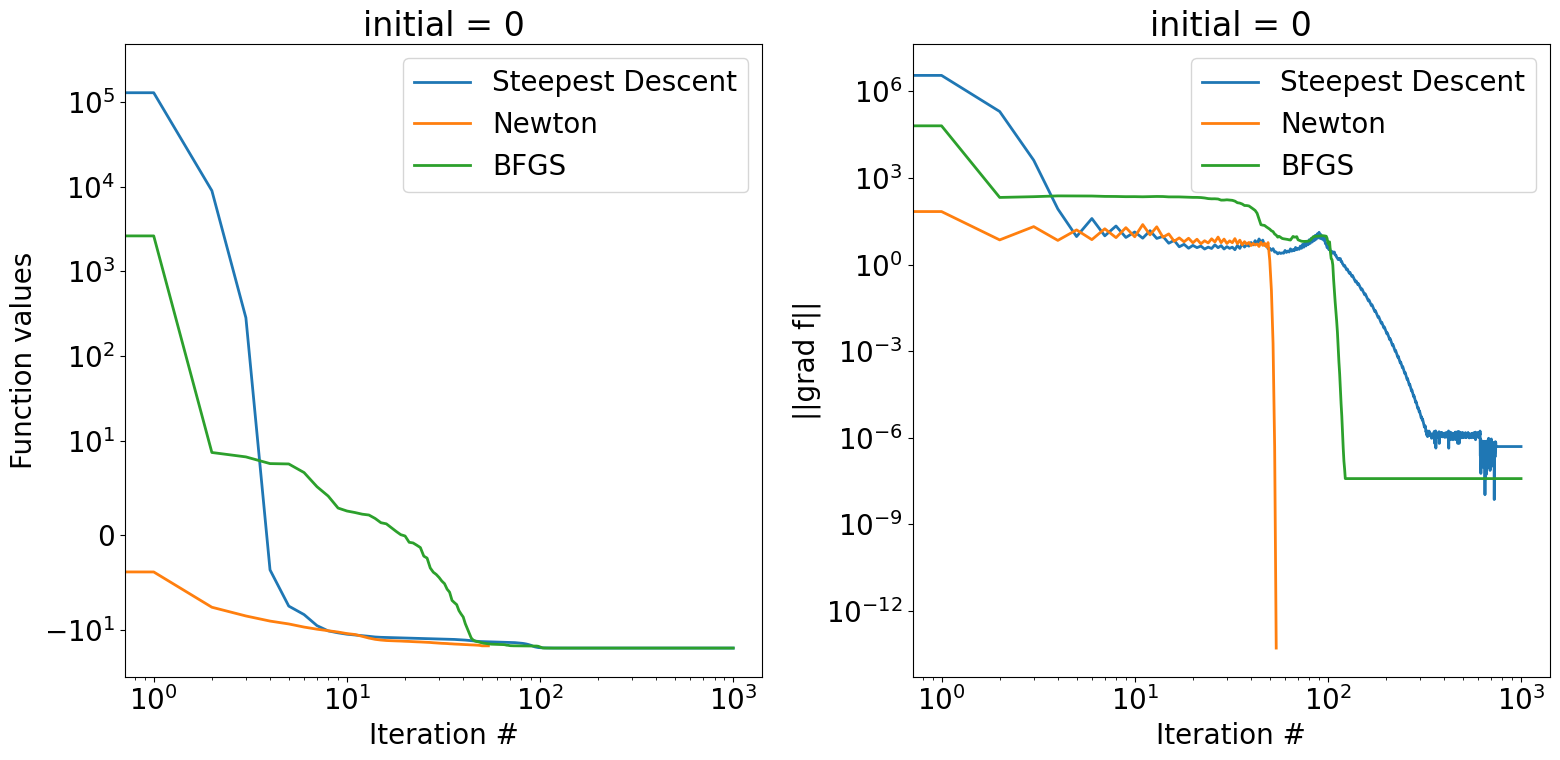

LJpot =  -1.0362756460071048
Initially, f =  -1.0362756460071048 , ||grad f|| =  148.0084568358469
Result: f = -15.5330600546, ||grad f|| = 5.227865e-07
itr =  1000
LJpot =  -7.0882694298515165
Initially, f =  -7.0882694298515165 , ||grad f|| =  15.775850241604772
Result: f = -15.5330600546, ||grad f|| = 3.494937e-13
itr =  156
LJpot =  -4.223575421838367
Initially, f =  -4.223575421838367 , ||grad f|| =  77.16092238062208
Result: f = -15.5330600546, ||grad f|| = 5.332048e-10
itr =  97


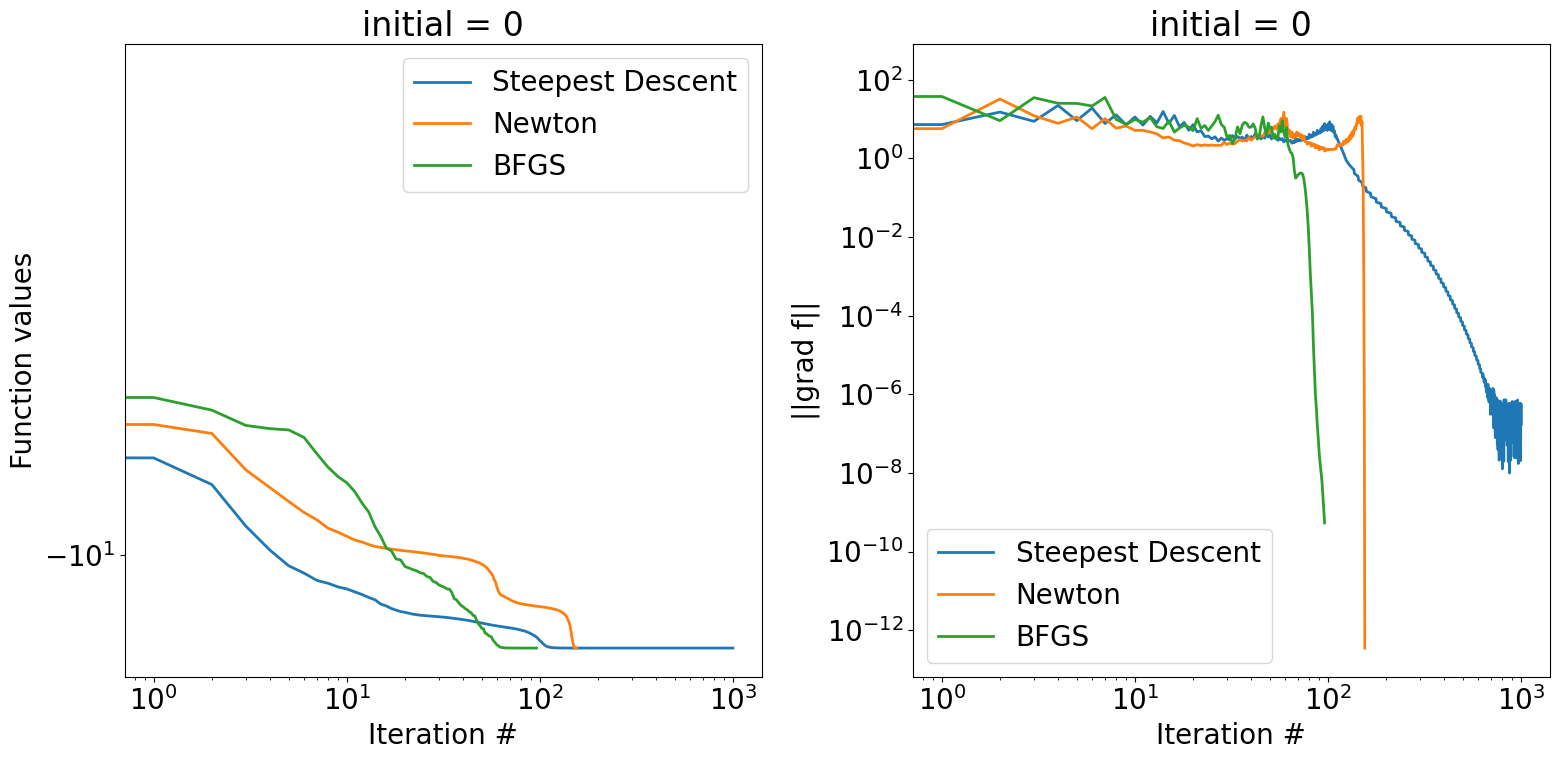

In [85]:
#random initials
initial=0
for i in range(10):
    plt.rcParams.update({'font.size': 20})
    plt.figure(figsize=(16,8))
    direction_dict = {0:"Steepest Descent",1:"Newton",2:"BFGS"} #0:"Steepest Descent",
    for direction in direction_dict:
        fvals, ngvals , itr=descend(initial,direction)
        plt.subplot(1, 2, 1)
        plt.plot(np.arange(itr),fvals[0:itr],linewidth = 2, label=direction_dict[direction]) #todo less than itermax
        plt.title("initial = "+str(initial))
        plt.xlabel("Iteration #")
        plt.xscale("log")
        plt.ylabel("Function values")
        plt.yscale('symlog', linthresh=10)
        plt.legend()
        #second plot of gradients
        plt.subplot(1, 2, 2)
        plt.plot(np.arange(itr),ngvals[0:itr],linewidth = 2, label=direction_dict[direction])
        plt.title("initial = "+str(initial))
        plt.xlabel("Iteration #")
        plt.xscale("log")
        plt.ylabel("||grad f||")
        plt.yscale("log")
        plt.legend()
    plt.tight_layout()    
    plt.show()
    
    #todo: change all to l